### III. Previsão de renda



|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

## Inportando os pacotes que serão utilizados para o Projeto:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from seaborn import load_dataset


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# Projeto de Análise de Renda

#### 1. Importação e Tratamento de Dados
Colocaremos aqui informações sobre a importação e tratamento dos dados.

#### 2. Modelo de Regressão Linear Simples
Vamos ajustar um modelo de regressão linear simples explicando a renda como variável resposta e o tempo_emprego como variável explicativa. Abaixo está uma tabela com observações:

#### 3. Análise de Resíduos
Vamos analisar os resíduos para melhorar nossa regressão.

#### 4. Modelo de Regressão Linear Múltipla
Ajustaremos um modelo de regressão linear múltipla para explicar a renda em relação às demais variáveis.

#### 5. Remoção de Variáveis Não Significativas
Analisaremos e removeremos as variáveis não significativas, ajustando novamente o modelo.

#### 6. Análise de Resíduos
Avaliaremos a qualidade do ajuste analisando os resíduos.


## Tratando os dados

### Bom antes de tudo vamos importar e tratar os dados:

In [3]:
dados = 'previsao_de_renda.csv'
df_original = pd.read_csv(dados)
df_original.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
# Vendo a quantidade de colunas e linhas que o nosso banco de dados tem:
df_original.shape
# Linhas X colunas

(15000, 16)

In [5]:
# vendo o tipo dos nossos dados:
df_original.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [6]:
# Vendo se temos dados, faltantes em nosso banco de daodos
df_original.isnull().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

Bom podemos observar que na coluna tempo, temos 2534 dados faltantes. Bom não achai necessidade de tratar os valores ausentes da coluna tempo_emprego, pois o tempo_emprego está relacionado ao tempo de emprego atual. Nesse caso a pessoa pode estar desempregada ou nunca ter tido registro em sua carteira. 

In [7]:
# Criando copia do dataframe
df_NaN_tratados = df_original.copy()
df_NaN_tratados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### Bom agora podemos começar o nosso modelo de regessão linear simples para **explicar** renda como variavel resposta, por tempo_emprego como variavel explicativa.

#### Antes de tudo vamos ver a correlação entre essas duas variaveis

In [8]:
# Vamos criar um dataframe
df1 = df_original[['renda', 'tempo_emprego']]
df1.head()

,renda,tempo_emprego
0,3369.24,3.575342
1,6096.14,0.860274
2,5658.98,8.065753
3,7246.69,1.208219
4,4017.37,13.873973


In [9]:
# Criando a matriz de correlação entre as duas variavies:
correlation_matrix = df1.corr()
correlation_matrix

,renda,tempo_emprego
renda,1.000000,0.394235
tempo_emprego,0.394235,1.000000


**Analise:** Bom aqui podemos perceber que a correlação entre as duas variaveis é baixa, já que uma correlação boa é proximo de -1 e 1. Nesse caso a nossa correlação está com 0,394 sendo assim baixa.


(0.0, 94405.947)

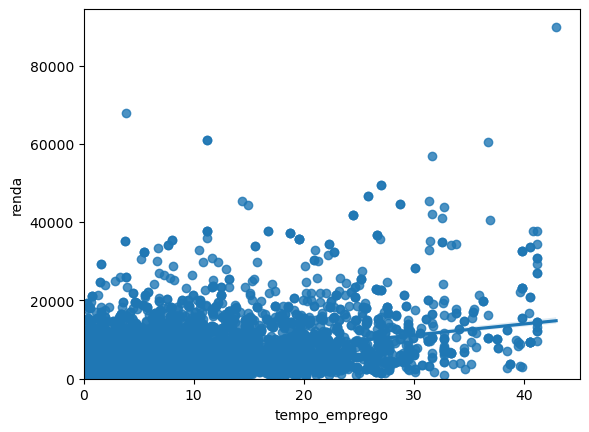

In [10]:
# Gerando um grafico de disperssão:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = df1)

x = np.linspace(0,df1['tempo_emprego'].max(),100)
y = .1*x

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [12]:
# vamos Desenvolver um modelo de regressão linear simples:
reg1 = smf.ols('renda ~ tempo_emprego', data = df1).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:37:41   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:37:41   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\2014306702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg1.resid


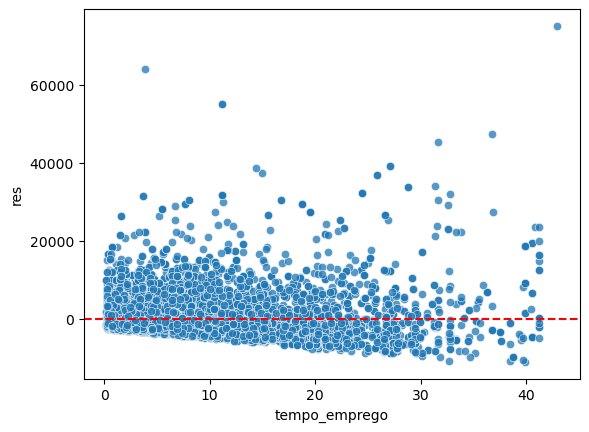

In [13]:
# Analisando os residuos 
reg1 = sm.OLS.from_formula('renda ~ tempo_emprego', data=df1).fit()
print(reg1.summary())
df1['res'] = reg1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

**Analise:** Bom podemos ver que o nosso R-squared não está muito bom. Já que o valor de R-squared é considerado bom quando o valor está proximo de 1 onde quanto mais proximo de 1indica que o modelo explica corretamente toda variabilidade dos dados resposta. Enquanto um valor proximo a 0 indica que o modelo não explica nada a variabilidade, quanto mais proximo de 1 melhor o modelo.

Tem alguns metodos onde podemos melhorar o fator de R-squared utilizando funções como; Polimonio de 2° Grau, Função Exponencial e função de Log. Bom Agora cabe a nós vermos quais dessas 3 funções irá melhorar o fator R-squared.

Após aplicarmos um desses metodos, irá melhor tambem a distribuição dos residuos. Um modelo de regressão linear simples é considerado bom quando os residuos estão centralizados ou proximos da centralização de 0.

#### Aplicando a função polimonio de 2° Grau

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:37:43   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\1314413433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg_p1.resid


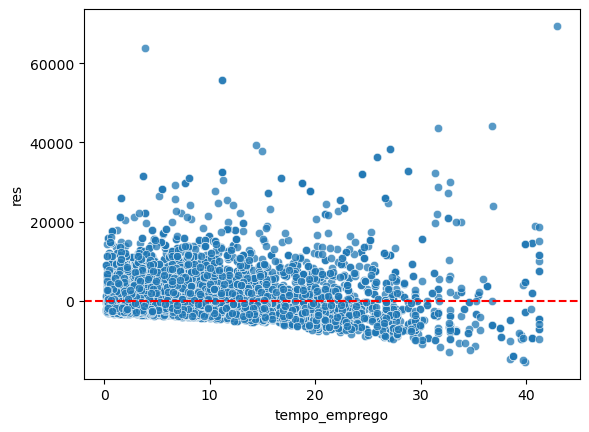

In [14]:
reg_p1 = sm.OLS.from_formula('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data=df1).fit()
print(reg_p1.summary())
df1['res'] = reg_p1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Aplicando a Função Exponencial:

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.921
Model:                            OLS   Adj. R-squared:                 -0.921
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                nan
Time:                        19:37:45   Log-Likelihood:            -1.2761e+05
No. Observations:               12466   AIC:                         2.552e+05
Df Residuals:                   12465   BIC:                         2.552e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.095e-

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\1418341175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg_e1.resid


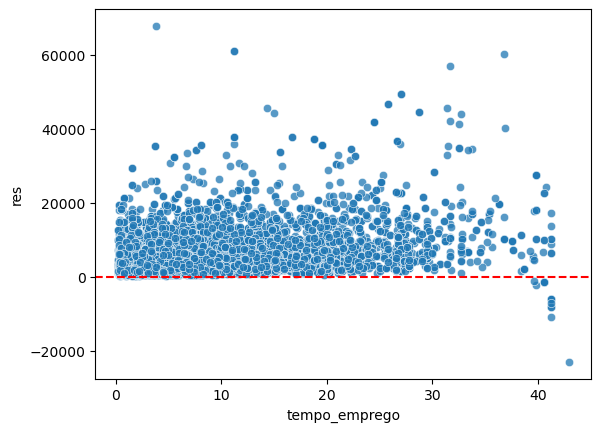

In [15]:
reg_e1 = sm.OLS.from_formula('renda ~ np.exp(tempo_emprego)', data=df1).fit()
print(reg_e1.summary())
df1['res'] = reg_e1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Ajustando uma função Logaritima

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.66e-236
Time:                        19:37:46   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.16

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\2556941327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg_l1.resid


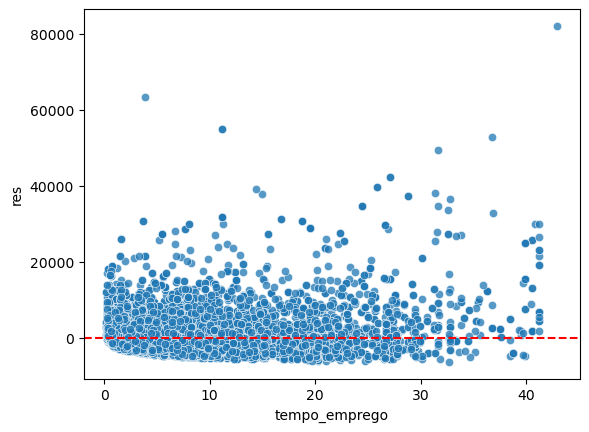

In [16]:
reg_l1 = sm.OLS.from_formula('renda ~ np.log(tempo_emprego)', data=df1).fit()
print(reg_l1.summary())
df1['res'] = reg_l1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

**Analise:** Após aplicarmos os 3 metodos o que gerou um valor de R-squared melhor foi a função que aplicamos polimonio de 2° grau na variavel reposta, onde obtivemos um R-squared mais proximo de 1.

### Agora vamos ajustar um modelo de regressão linear multipla para explicar a variavel renda de acordo com as demais variaveis.

#### Para iniciarmos a criação do modelo de regressão linear multipla para explicar a variavel renda, vamos ver a correlação dos dados enntre si e descidir quais são as melhores variaveis explicativas para usarmos no modelo.

In [17]:
df_3t = df_NaN_tratados.copy()
df_3t.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [18]:
# Removendo as linhas com missings:
df_3t = df_3t.dropna(subset=['tempo_emprego'])

In [19]:
df_3t.isnull().sum()

Unnamed: 0               0
data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

In [20]:
# Lista de variáveis qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']

# Criando variáveis dummy para as variáveis qualitativas
df_dummies = pd.get_dummies(df_3t[variaveis_qualitativas])

# Concatenando as variáveis dummy com o DataFrame original
df_3t_expandido = pd.concat([df_3t, df_dummies], axis=1)

# Calculando a matriz de correlação
correlacao_expandida = df_3t_expandido.corr()
correlacao_expandida

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
Unnamed: 0,1.000000,-0.001966,0.001677,0.009501,0.014926,0.000748,-0.002146,0.013749,0.017216,0.004088,...,0.017533,-0.009638,-0.007660,-0.010443,0.020491,-0.009592,-0.009773,-0.001914,0.001327,0.016118
index,-0.001966,1.000000,-0.017210,-0.093786,0.036835,-0.022515,-0.034574,0.040464,0.132285,-0.008561,...,-0.017762,-0.000523,-0.007355,-0.026854,-0.031405,-0.005679,0.017688,0.014208,-0.007960,0.007482
posse_de_veiculo,0.001677,-0.017210,1.000000,0.003308,0.077668,-0.090136,-0.087514,0.122773,-0.013536,0.040626,...,-0.086487,-0.080443,-0.052943,-0.056959,0.012207,-0.019630,0.008196,0.019390,0.037241,-0.010749
posse_de_imovel,0.009501,-0.093786,0.003308,1.000000,0.024429,0.081715,0.000112,0.015852,-0.016710,0.040138,...,0.002469,0.003990,-0.049326,0.019273,-0.012476,0.202539,-0.165027,-0.019169,-0.031120,-0.123305
qtd_filhos,0.014926,0.036835,0.077668,0.024429,1.000000,-0.289012,-0.074250,0.908703,0.009931,-0.016189,...,-0.010240,-0.153951,-0.011714,-0.075808,-0.007650,-0.005740,0.005430,-0.020523,0.027036,0.003343
idade,0.000748,-0.022515,-0.090136,0.081715,-0.289012,1.000000,0.323934,-0.257281,-0.016428,0.151364,...,0.091515,-0.093653,-0.068589,0.150408,-0.048627,0.131715,-0.173187,0.001906,0.001844,0.016449
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,...,0.020818,-0.016219,-0.016494,0.019191,-0.043974,0.055545,-0.065665,-0.010665,0.021276,0.007880
qt_pessoas_residencia,0.013749,0.040464,0.122773,0.015852,0.908703,-0.257281,-0.065748,1.000000,0.003058,-0.004865,...,-0.212683,-0.437603,0.052791,-0.198233,-0.015801,0.013472,-0.007053,-0.022213,0.027305,-0.009349
mau,0.017216,0.132285,-0.013536,-0.016710,0.009931,-0.016428,-0.047722,0.003058,1.000000,-0.014952,...,-0.004576,0.021150,0.011789,0.007879,0.007753,0.010648,-0.012722,-0.003841,0.003913,-0.008783
renda,0.004088,-0.008561,0.040626,0.040138,-0.016189,0.151364,0.394235,-0.004865,-0.014952,1.000000,...,-0.010472,-0.008739,-0.025794,-0.020865,-0.000879,0.046011,-0.051294,-0.004984,0.016627,-0.023455


In [21]:
# Identificar as correlações mais fortes com a variável 
strong_correlations = correlacao_expandida['renda'].abs().sort_values(ascending=False)
print("Correlações mais fortes com renda:")
print(strong_correlations)

# Escolher um limiar de correlação, por exemplo, 0.5
threshold = 0.5
strong_correlations = strong_correlations[strong_correlations > threshold]
print("\nCorrelações mais fortes acima do limiar de", threshold)
strong_correlations

Correlações mais fortes com renda:
renda                            1.000000
tempo_emprego                    0.394235
sexo_M                           0.158318
sexo_F                           0.158318
idade                            0.151364
tipo_renda_Assalariado           0.078593
tipo_renda_Servidor público      0.057471
tipo_residencia_Com os pais      0.051294
educacao_Superior completo       0.050266
tipo_residencia_Casa             0.046011
tipo_renda_Empresário            0.045610
posse_de_veiculo                 0.040626
posse_de_veiculo                 0.040626
posse_de_imovel                  0.040138
posse_de_imovel                  0.040138
educacao_Secundário              0.035191
estado_civil_Casado              0.034622
educacao_Superior incompleto     0.029586
estado_civil_União               0.025794
tipo_residencia_Governamental    0.023455
estado_civil_Viúvo               0.020865
tipo_residencia_Estúdio          0.016627
qtd_filhos                       0.016189

renda    1.0
Name: renda, dtype: float64

In [22]:
# gráfico clustermap
#cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
#sns.clustermap(correlacao_expandida, figsize=(10, 10), center=0, cmap=cmap)

In [23]:
reg3 = smf.ols('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + C(mau)', data = df_NaN_tratados).fit()

In [24]:
df_NaN_tratados['res_log'] = reg3.resid

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:37:57   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
C(sexo)[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
C(posse_de_veiculo)[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
C(posse_de_imovel)[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
C(tipo_renda)[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
C(tipo_renda)[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
C(tipo_renda)[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
C(tipo_renda)[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
C(educacao)[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
C(educacao)[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
C(educacao)[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
C(educacao)[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
C(estado_civil)[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
C(estado_civil)[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
C(estado_civil)[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
C(estado_civil)[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
C(tipo_residencia)[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
C(tipo_residencia)[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
C(tipo_residencia)[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
C(tipo_residencia)[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
C(tipo_residencia)[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
C(mau)[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                           -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                                  29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                         299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia                 308.7311    788.615      0.391      0.695   -1237.077    1854.539
===================================================================

**Analise:** Bom agora para nós vermos se a variavel é estatisticamente significante para o modelo, temos que olhar a P>|t| se for menor que 5% a variavel é estatisticamente significante. com essa analise vamos descobrir quais variaveis vamos deixar no modelo.

In [25]:
# Analisando o P>|t| do modelo 
reg3_summary = reg3.summary()

# Extraindo os p-values
p_values = reg3_summary.tables[1].data[1:]

# Convertendo os p-values para números
p_values = [float(p[4]) for p in p_values]

# Criando um DataFrame com os coeficientes e p-values
coef_table = pd.DataFrame({'Coefficient': reg3.params, 'P-value': p_values}, index=reg3.params.index)

# Filtrando as variáveis com P-value menor que 0.05
significant_vars = coef_table[coef_table['P-value'] < 0.05]

# Exibindo as variáveis significativas
print("Variáveis estatisticamente significativas:")
print(significant_vars)

Variáveis estatisticamente significativas:
                                     Coefficient  P-value
C(sexo)[T.M]                         2366.309337    0.000
C(posse_de_imovel)[T.True]            348.887966    0.000
C(tipo_renda)[T.Empresário]          1021.982914    0.000
C(tipo_renda)[T.Servidor público]     436.930208    0.001
C(educacao)[T.Pós graduação]         2207.179571    0.041
C(tipo_residencia)[T.Governamental]  -883.460103    0.026
idade                                  29.876248    0.000
tempo_emprego                         299.313940    0.000


#### Separando apenas as variaveis que teve P>|t| menor que 5%, pois assim removeremos as variaveis não significantes para o nosso modelo.

In [26]:
reg31 = smf.ols('renda ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + C(educacao) + idade + C(tipo_residencia)' , data = df_NaN_tratados).fit()

In [27]:
df_NaN_tratados['res_log'] = reg31.resid

reg31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.1
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:40:32   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12448   BIC:                         2.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             432.6463    567.947      0.762      0.446    -680.618    1545.911
C(sexo)[T.M]                         2358.8221     82.247     28.680      0.000    2197.606    2520.038
C(posse_de_imovel)[T.True]            355.0585     83.220      4.266      0.000     191.934     518.183
C(tipo_renda)[T.Bolsista]            -775.8018   2154.712     -0.360      0.719   -4999.370    3447.767
C(tipo_renda)[T.Empresário]          1020.9113     89.915     11.354      0.000     844.665    1197.158
C(tipo_renda)[T.Pensionista]         1730.3331   1436.724      1.204      0.228   -1085.868    4546.535
C(tipo_renda)[T.Servidor público]     443.5468    130.381      3.402      0.001     187.980     699.113
C(educacao)[T.Pós graduação]         2248.8260   1079.826      2.083      0.037     132.201    4365.451
C(educacao)[T.Secundário]            -223.5394    437.294     -0.511      0.609   -1080.703     633.624
C(educacao)[T.Superior completo]      346.4178    438.835      0.789      0.430    -513.767    1206.602
C(educacao)[T.Superior incompleto]   -280.6189    470.409     -0.597      0.551   -1202.693     641.455
C(tipo_residencia)[T.Casa]           -359.8667    328.193     -1.097      0.273   -1003.176     283.442
C(tipo_residencia)[T.Com os pais]    -652.1512    368.203     -1.771      0.077   -1373.886      69.583
C(tipo_residencia)[T.Comunitário]    -612.6789    633.683     -0.967      0.334   -1854.796     629.438
C(tipo_residencia)[T.Estúdio]        -970.0785    546.744     -1.774      0.076   -2041.781     101.624
C(tipo_residencia)[T.Governamental]  -881.8503    397.012     -2.221      0.026   -1660.054    -103.646
tempo_emprego                         300.1017      6.127     48.977      0.000     288.091     312.112
idade                                  26.8971      4.511      5.963      0.000      18.055      35.739
==============================================================================
Omnibus:                    10072.162   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431977.451
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.937   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analise:** Bom após fazermos um modelo de regrssão linear multipla e deixarmos as apenass as variaveis explicativas, agora vamos tentar melhorar o R-squared utilizando um daqueles metodos anteriores. Iremos aplicar esse matodo apenas na variavel resposta.

In [30]:
# aplicando o polimonio de 2° Grau na variavel resposta.
reg32 = smf.ols('np.power(renda, 2) ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + C(educacao) + idade + C(tipo_residencia)' , data = df_NaN_tratados).fit()

In [31]:
df_NaN_tratados['res_log'] = reg32.resid

reg32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     80.71
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.49e-266
Time:                        19:56:02   Log-Likelihood:            -2.5304e+05
No. Observations:               12466   AIC:                         5.061e+05
Df Residuals:                   12448   BIC:                         5.063e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -4.008e+07   2.09e+07     -1.919      0.055    -8.1e+07    8.65e+05
C(sexo)[T.M]                         4.103e+07   3.02e+06     13.567      0.000    3.51e+07     4.7e+07
C(posse_de_imovel)[T.True]           4.725e+06   3.06e+06      1.544      0.123   -1.27e+06    1.07e+07
C(tipo_renda)[T.Bolsista]           -3.473e+07   7.92e+07     -0.438      0.661    -1.9e+08    1.21e+08
C(tipo_renda)[T.Empresário]          2.463e+07   3.31e+06      7.449      0.000    1.81e+07    3.11e+07
C(tipo_renda)[T.Pensionista]         2.187e+07   5.28e+07      0.414      0.679   -8.17e+07    1.25e+08
C(tipo_renda)[T.Servidor público]    6.846e+06   4.79e+06      1.428      0.153   -2.55e+06    1.62e+07
C(educacao)[T.Pós graduação]         2.792e+07   3.97e+07      0.703      0.482   -4.99e+07    1.06e+08
C(educacao)[T.Secundário]           -8.082e+06   1.61e+07     -0.503      0.615   -3.96e+07    2.34e+07
C(educacao)[T.Superior completo]     3.712e+06   1.61e+07      0.230      0.818   -2.79e+07    3.53e+07
C(educacao)[T.Superior incompleto]  -9.683e+06   1.73e+07     -0.560      0.576   -4.36e+07    2.42e+07
C(tipo_residencia)[T.Casa]          -1.608e+07   1.21e+07     -1.333      0.183   -3.97e+07    7.58e+06
C(tipo_residencia)[T.Com os pais]   -1.944e+07   1.35e+07     -1.436      0.151    -4.6e+07     7.1e+06
C(tipo_residencia)[T.Comunitário]   -2.749e+07   2.33e+07     -1.180      0.238   -7.32e+07    1.82e+07
C(tipo_residencia)[T.Estúdio]       -2.429e+07   2.01e+07     -1.208      0.227   -6.37e+07    1.51e+07
C(tipo_residencia)[T.Governamental] -2.799e+07   1.46e+07     -1.917      0.055   -5.66e+07    6.28e+05
tempo_emprego                         7.22e+06   2.25e+05     32.039      0.000    6.78e+06    7.66e+06
idade                                6.504e+05   1.66e+05      3.921      0.000    3.25e+05    9.76e+05
==============================================================================
Omnibus:                    26413.359   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        202482457.561
Skew:                          18.263   Prob(JB):                         0.00
Kurtosis:                     626.292   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\1810712790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg31.resid


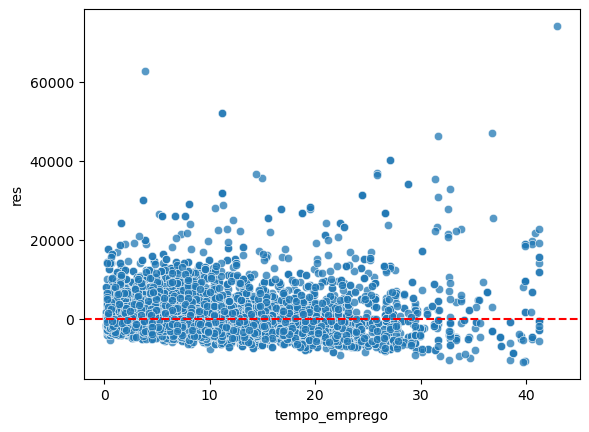

In [34]:
# Gerando um grafico de residuos sem aplicar a função de plomonio de 2° Grau na variavel resposta
df1['res'] = reg31.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_88044\305367553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = reg32.resid


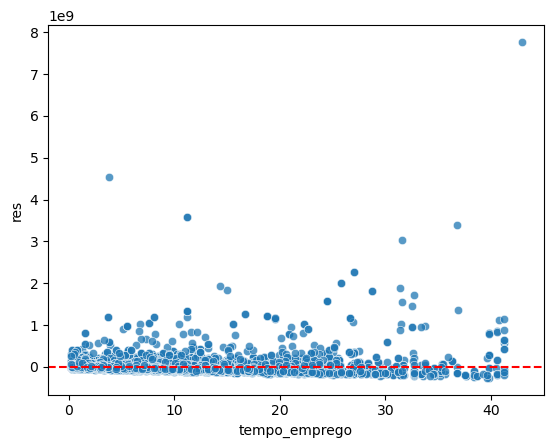

In [35]:
# Gerando um grafico de residuos aplicando a função polimonio de 2° Grau
df1['res'] = reg32.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

**Analise:** Bom após o final das crianções dos nosso modelos de regressão linear multipla, podemos chegar na conclusão que as variaveis; idade, sexo e tempo emprego  são as que tem maior correlação com a nossa variavel resposta. 

Após nós trazemos apenas as variaveis com maior correlação com a variavel resposta, nós tivemos um R-squared igual a 0.220. Com isso chegamos a conclusão que variabilidade da nossa variavel resposta com os dados é baixa. com tudo após aplicarmos alguns metodos o nosso R-squared aumentou significamente 
